# Importando librerías

In [1]:
import pandas as pd
import numpy as np
# Valores faltantes
import missingno as msno
# Atípicos
import matplotlib.pyplot as plt
import seaborn as sns

# Importando las bases de datos

In [2]:
df_title_crew_4 = pd.read_csv('./db/title.crew.tsv', sep='\t', on_bad_lines='skip')

# Exploración de datos

In [3]:
df_title_crew_4.shape
#(10612480, 3)

(10612480, 3)

##### Reemplazar para que numpy entienda valores faltantes

In [4]:
df_title_crew_4.replace({'\\N': np.nan}, inplace=True)

In [5]:
df_title_crew_4.tail(13)

,tconst,directors,writers
10612467,tt9916832,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10612468,tt9916834,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10612469,tt9916836,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10612470,tt9916838,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10612471,tt9916840,nm0996406,"nm1482639,nm2586970"
10612472,tt9916842,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10612473,tt9916844,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10612474,tt9916846,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10612475,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10612476,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"


# Valores nulos

<AxesSubplot:>

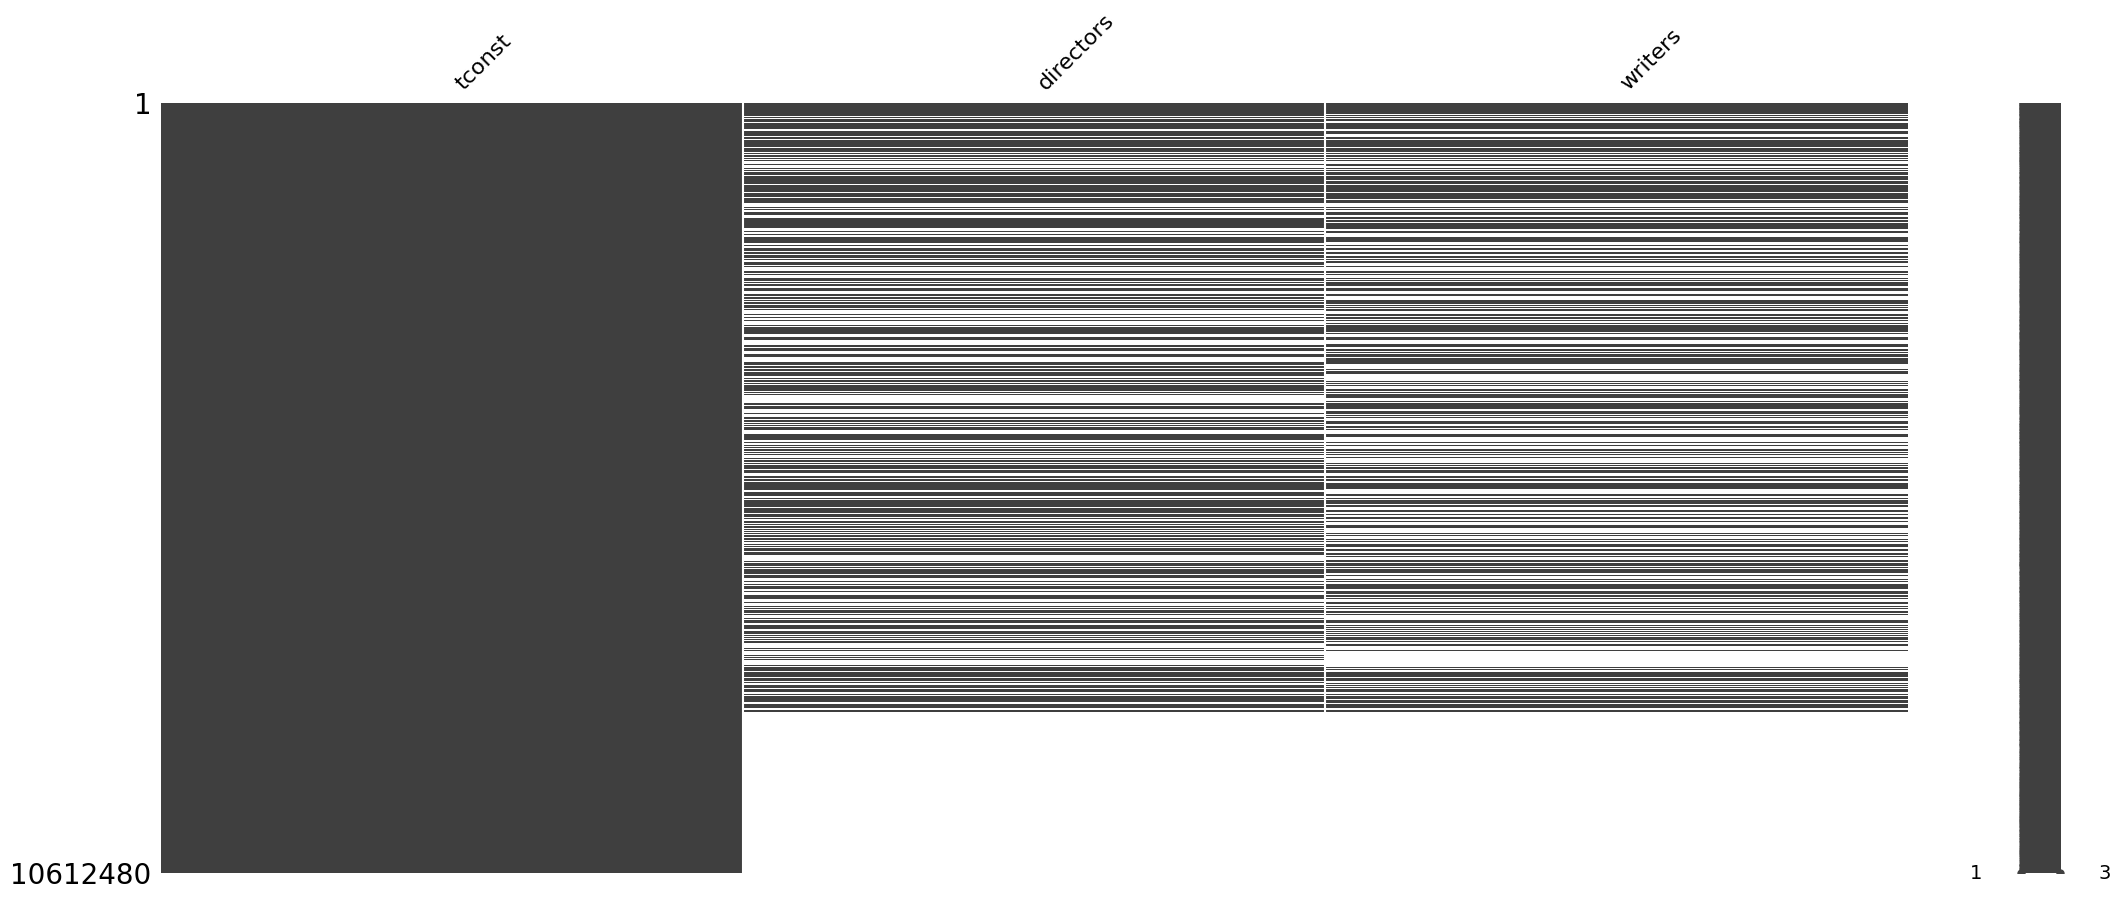

In [6]:
msno.matrix(df_title_crew_4)

In [7]:
df_nulos_title_crew_4 = df_title_crew_4.isnull().sum()

df_nulos_title_crew_4

tconst             0
directors    4053171
writers      4713999
dtype: int64

###### Eliminar

In [8]:
# Eliminar filas con valores faltantes en directors y writers
df_title_crew_4 = df_title_crew_4.dropna(subset=['directors', 'writers'])

###### Inputar

# Before clean

<AxesSubplot:>

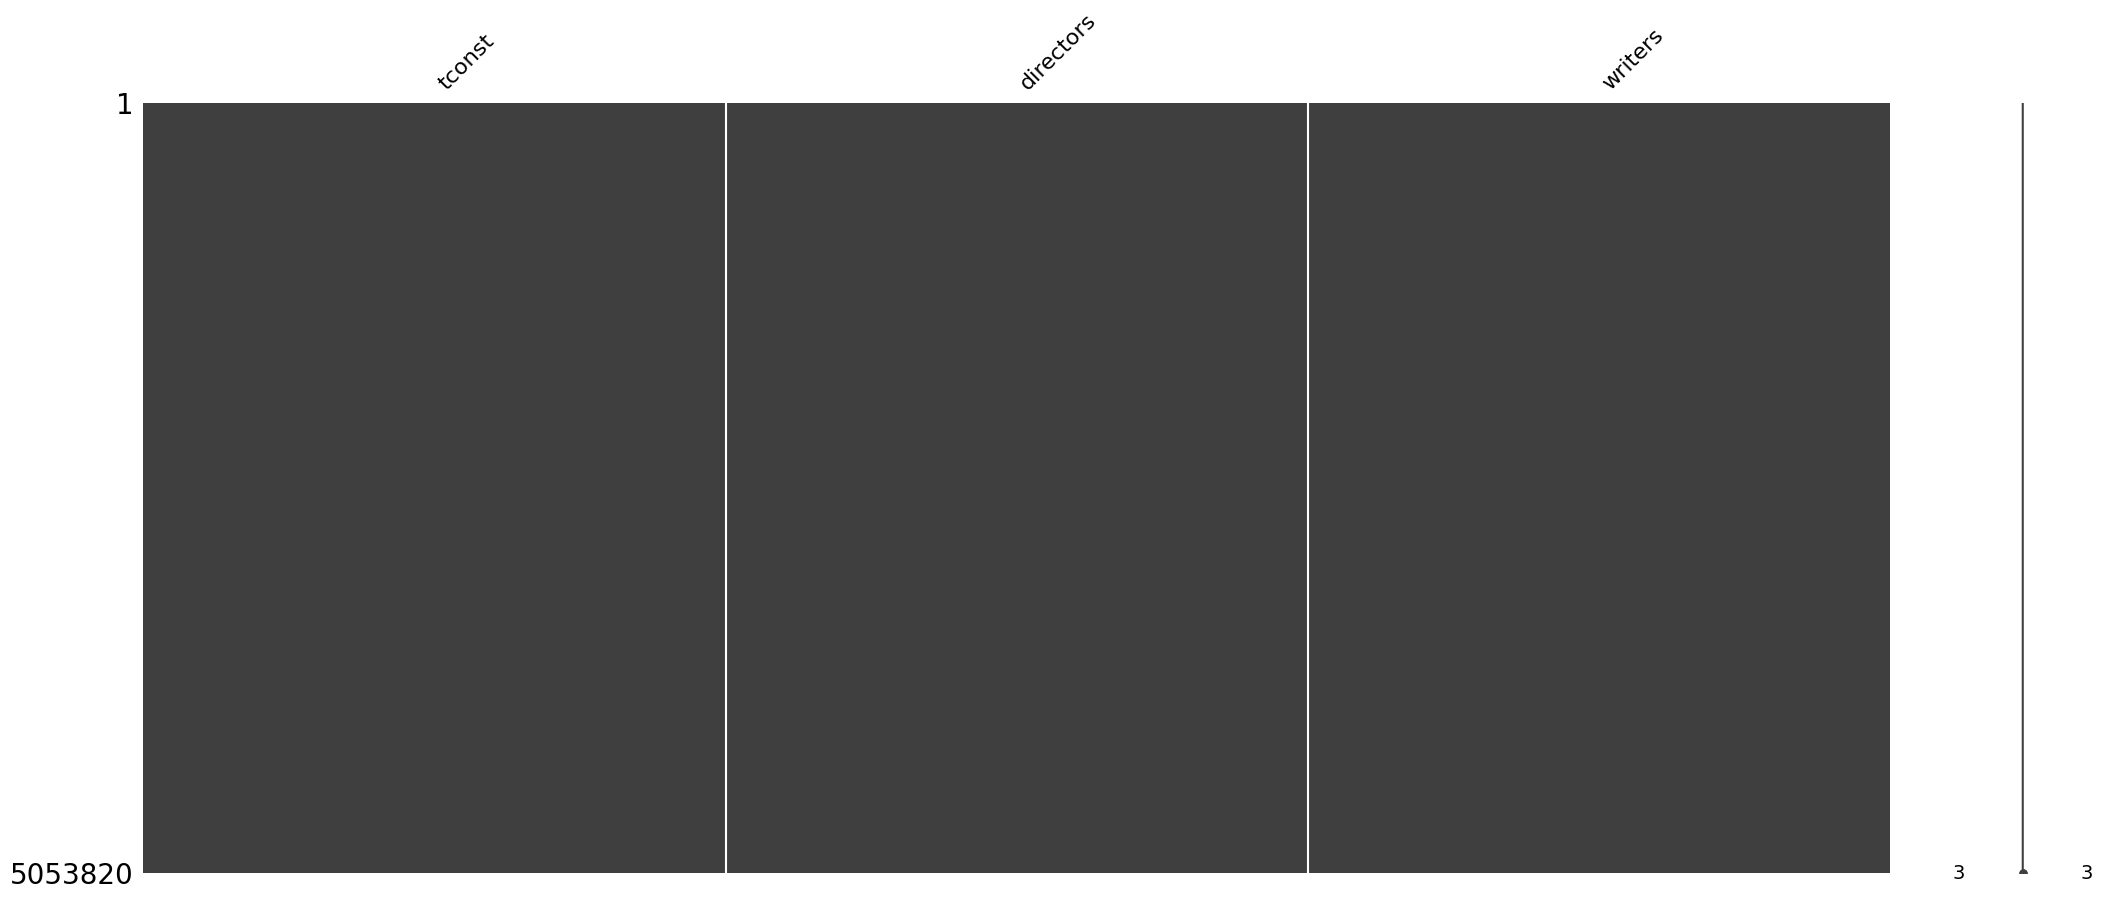

In [9]:
msno.matrix(df_title_crew_4)

In [10]:
df_title_crew_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5053820 entries, 8 to 10612479
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 154.2+ MB


# Encontrar agrupaciones 

In [5]:
# Dividir los valores de la columna "writers" en listas separadas por comas
writers_split = df_title_crew_4['writers'].str.split(',')

# Aplanar todas las listas en una sola y crear un DataFrame temporal para contar los valores únicos
all_writers = pd.Series([item for sublist in writers_split.dropna() for item in sublist])

# Contar la frecuencia de cada profesión
writers_count = all_writers.value_counts()

# Mostrar los resultados
print(writers_count)

nm6352729     23806
nm0438471     17674
nm0914844     13495
nm5203198     12803
nm0068589     12409
              ...  
nm13318554        1
nm13318597        1
nm5502505         1
nm4354054         1
nm6951431         1
Length: 1011625, dtype: int64


In [6]:
# Obtener solo los nombres de los títulos como un índice
names_only_wirters = writers_count.index

# Convertir los nombres a una lista si es necesario
# writers_unique = pd.DataFrame(names_only_wirters.tolist())
writers_unique = names_only_wirters.tolist()

# Mostrar el resultado
print(writers_unique[:10])

['nm6352729', 'nm0438471', 'nm0914844', 'nm5203198', 'nm0068589', 'nm0596393', 'nm0068347', 'nm0734570', 'nm7370686', 'nm0912726']


In [16]:
len(writers_unique)

1011625

# Normalizando

In [7]:
# Crear un DataFrame para los escritores únicos
writers_unique = pd.DataFrame({
    'writer_id': range(1, 1011626),
    'writer': writers_unique
})


In [ ]:
# Descomponer la columna writers
df_expanded_title_crew_4 = df_title_crew_4.assign(writers=df_title_crew_4['writers'].str.split(',')).explode('writers')

# Unir con la tabla de escritores únicos para obtener los IDs de escritores
df_expanded_title_crew_4 = pd.merge(df_expanded_title_crew_4, writers_unique, left_on='writers', right_on='writer', how='left')

# Eliminar la columna writers original y renombrar la columna writer_id
df_expanded_title_crew_4 = df_expanded_title_crew_4.drop(columns=['writers', 'writer']).rename(columns={'writer_id': 'writer_id'})


# Exportando

In [11]:

# Exportar data clean
df_title_crew_4.to_csv('title_crew_4_cleaned.csv', index=False)

In [8]:
# Guardar la tabla de escritores únicos en un archivo CSV
writers_unique.to_csv('writers_unique.csv', index=False)

In [ ]:
# Guardar el DataFrame normalizado en un archivo CSV
df_expanded_title_crew_4.to_csv('title_crew_4_normalized.csv', index=False)